### EDA Multiple Cancer Detection CNN - Casey Kellett Whitwham

---

Imports

---

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import os

---

Define image paths for EDA

---

In [4]:
rows = [
    ["./EDA_images/all_benign.jpg","./EDA_images/all_early.jpg", "./EDA_images/all_pre.jpg", "./EDA_images/all_pro.jpg"],
    ["./EDA_images/brain_glioma.jpg", "./EDA_images/brain_menin.jpg", "./EDA_images/brain_tumor.jpg"],
    ["./EDA_images/breast_benign.jpg", "./EDA_images/breast_malignant.jpg"],
    ["./EDA_images/cervix_dyk.jpg", "./EDA_images/cervix_koc.jpg","./EDA_images/cervix_mep.jpg", "./EDA_images/cervix_pab.jpg", "./EDA_images/cervix_sfi.jpg"],
    ["./EDA_images/kidney_normal.jpg", "./EDA_images/kidney_tumor.jpg"],
    ["./EDA_images/colon_aca.jpg", "./EDA_images/colon_bnt.jpg","./EDA_images/lung_aca.jpg", "./EDA_images/lung_bnt.jpg", "./EDA_images/lung_scc.jpg"],
    ["./EDA_images/lymph_cll.jpg", "./EDA_images/lymph_fl.jpg", "./EDA_images/lymph_mcl.jpg"],
    ["./EDA_images/oral_normal.jpg", "./EDA_images/oral_scc.jpg"]
]


---

Define image titles for plot

---

In [5]:


titles = [
    ["Leukemia - Benign", "Leukemia - Early", "Leukemia - Pre", "Leukemia - Pro"],
    ["Brain - Glioma", "Brain - Meningioma", "Brain - Pituitary Tumor"],
    ["Breast - Benign", "Breast - Malignant"],
    ["Cervical - Dyskeratotic", "Cervical - Koilocytotic", "Cervical - Metaplastic", "Cervical - Parabasal", "Cervical - Superficial-Intermediate"],
    ["Kidney - Normal","Kidney - Tumor"],
    ["Colon - Adenocarcinoma","Colon - Benign Tissue","Lung - Adenocarcinoma","Lung - Benign Tissue","Lung - Squamous Cell Carcinoma"],
    ["Lymphoma - Lymphocytic Leukemia", "Lymphoma - Follicular", "Lymphoma - Mantle Cell"],
    ["Oral - Normal", "Oral - Squamous Cell Carcinoma"],
]

---

Plot images with each row representing a different cancer type

---

Results: Obvious patterns visible, model will perform well with this data.

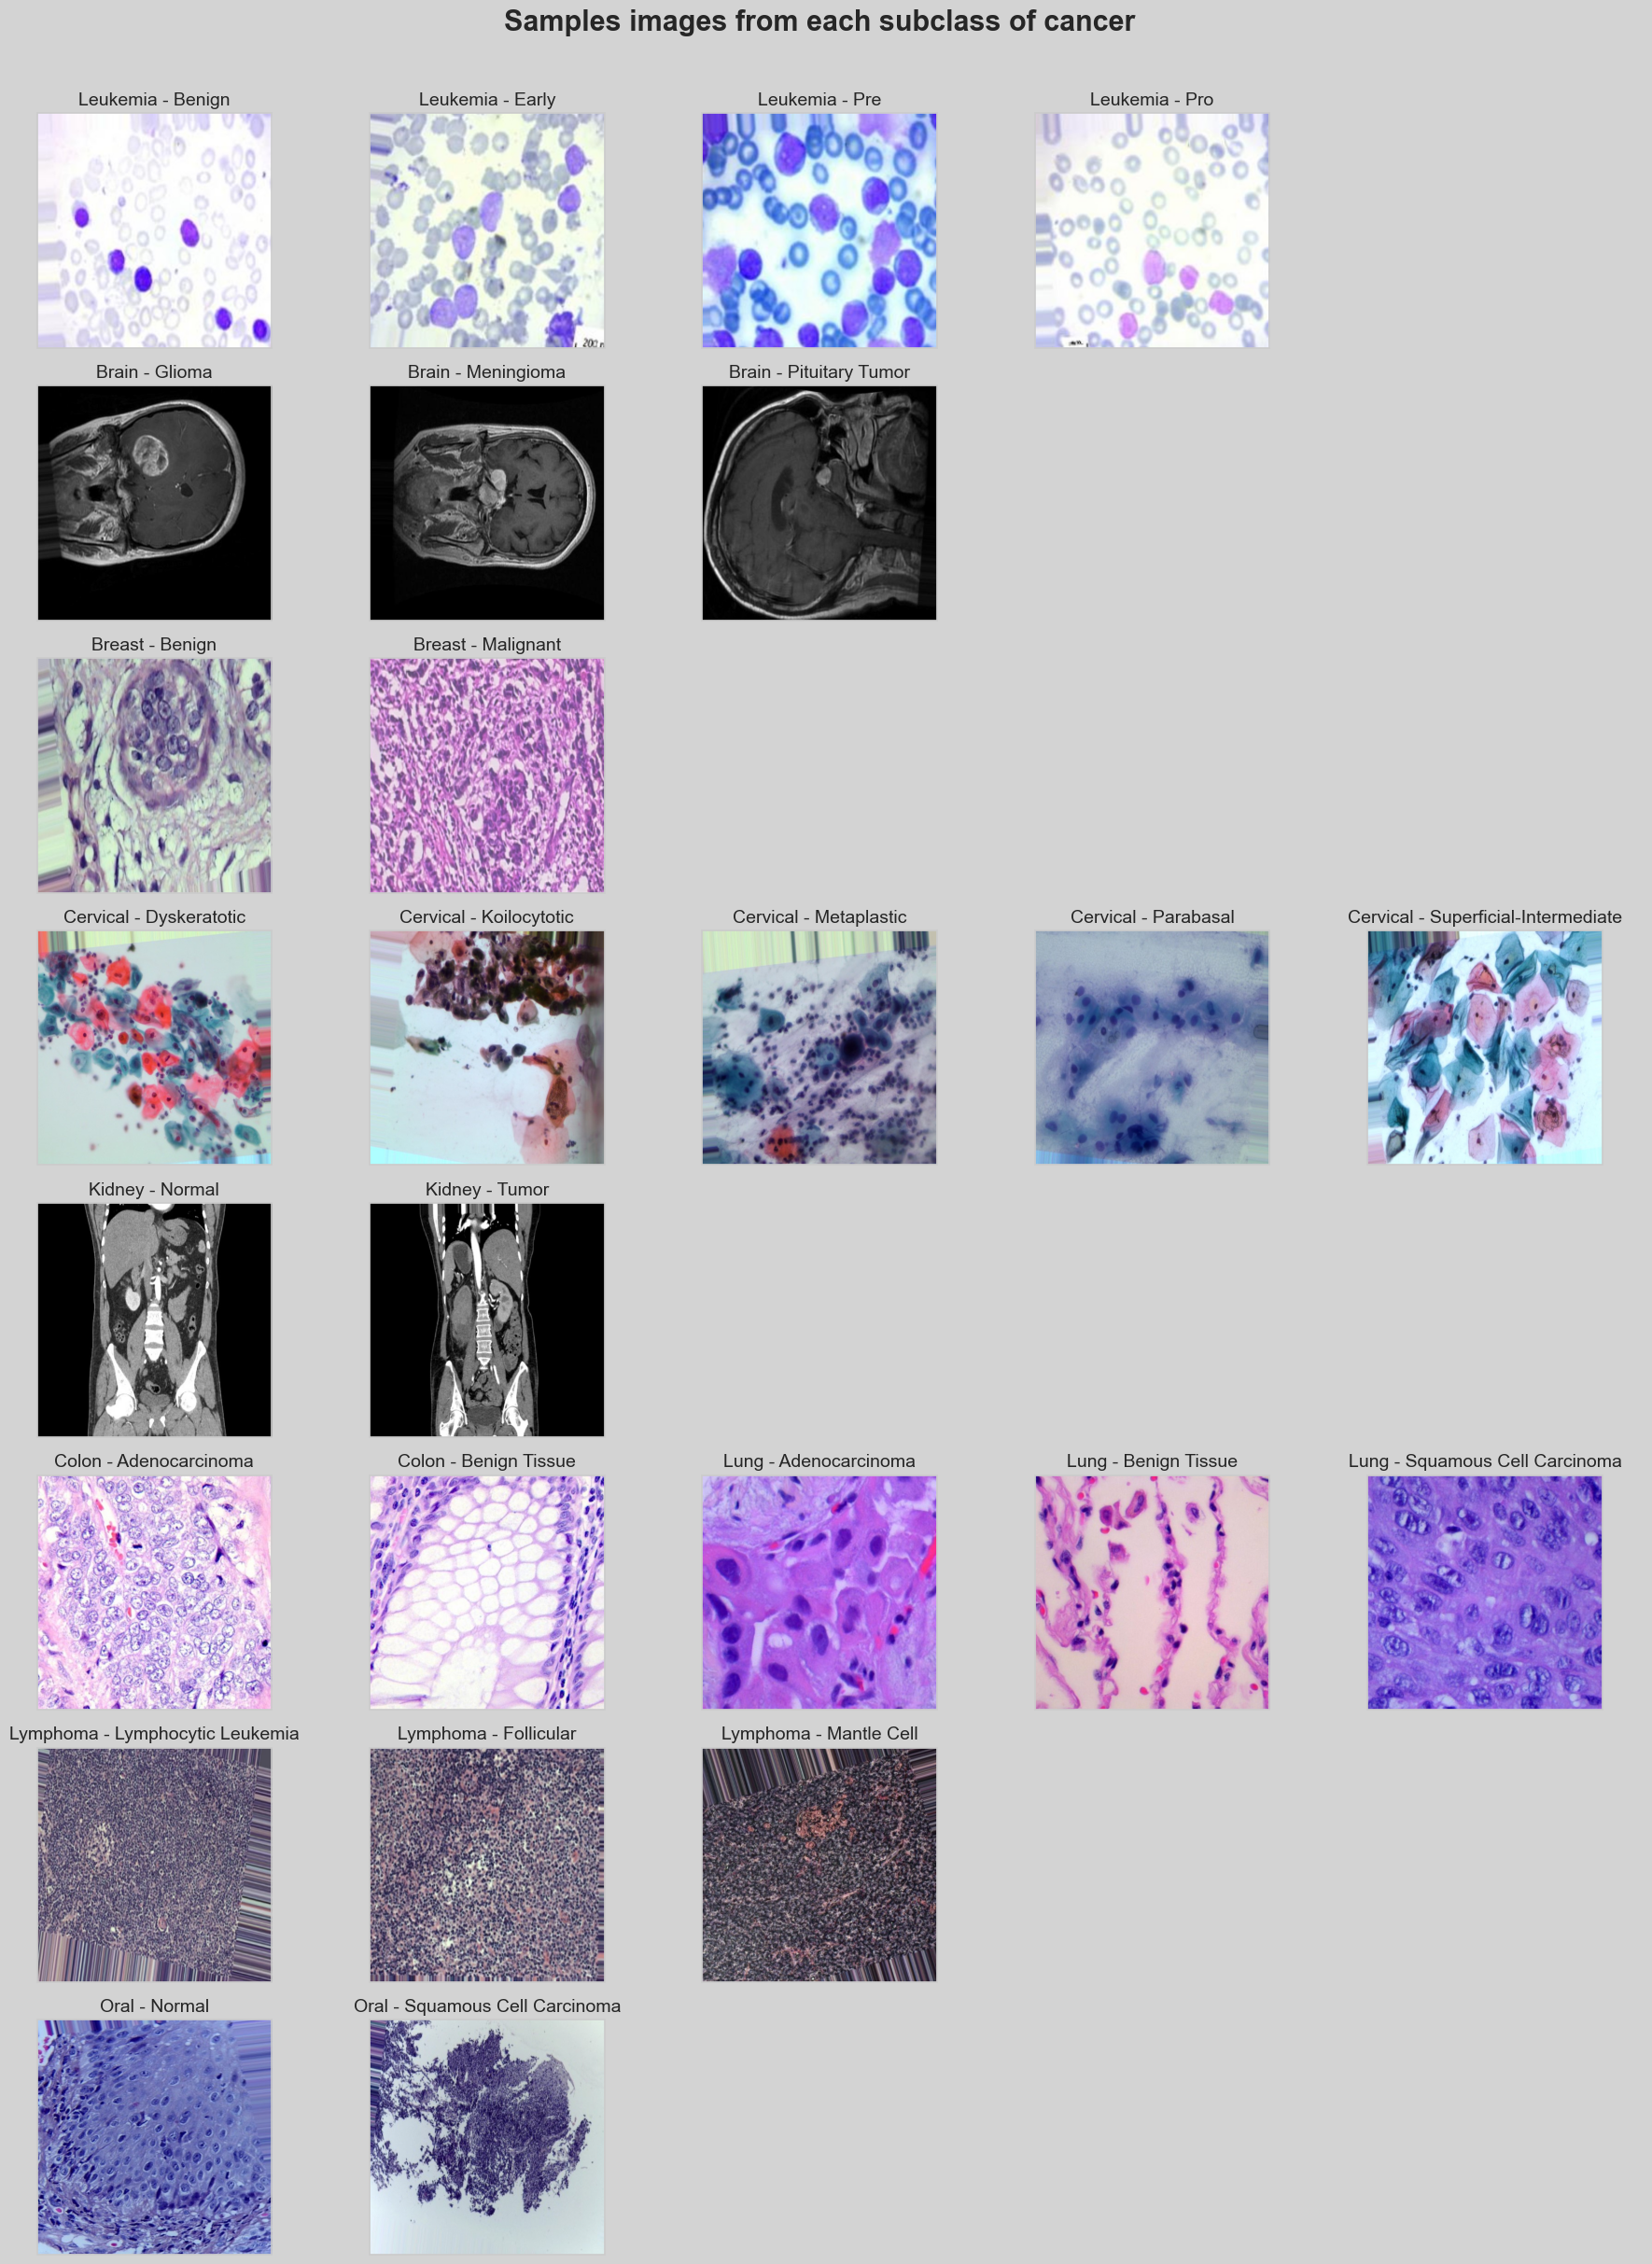

: 

In [ ]:
fig, axes = plt.subplots(8, 5, figsize=(18, 24))
fig.patch.set_facecolor('lightgray')

for i, row in enumerate(rows):
    for j, path in enumerate(row):
        ax = axes[i, j]
        if path and os.path.exists(path):
            img = mpimg.imread(path)
            ax.imshow(img)
            ax.set_title(titles[i][j], fontsize=14)
        else:
            ax.axis('off')

        ax.set_xticks([])
        ax.set_yticks([])

    for j in range(len(row), 5):
        axes[i, j].axis('off')

plt.suptitle("Samples images from each subclass of cancer", fontsize=22, fontweight='bold', y=1.01)

plt.tight_layout()
plt.show()


---

Check class distributions

Results: All subclasses are even with 5k samples (oral cancers have 5001)

---

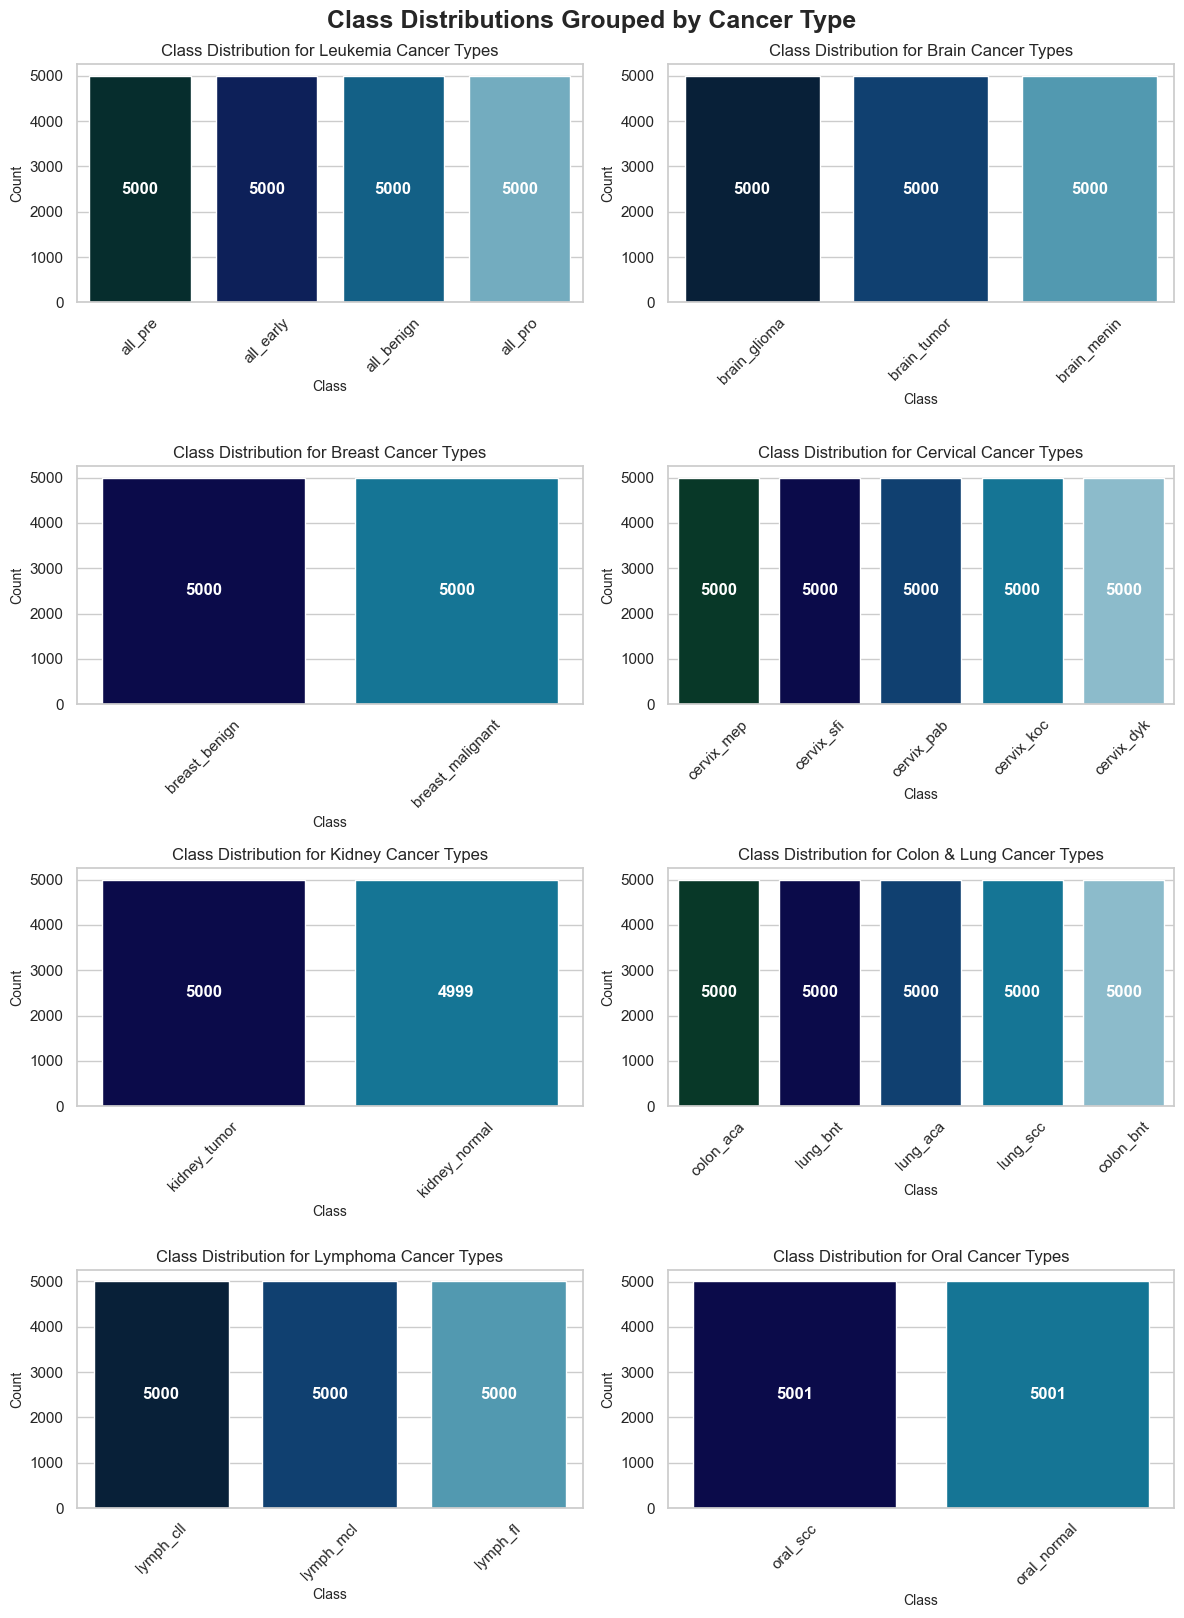

In [7]:
df = pd.read_csv("cancer_dataset.csv")

cancertypes = ["Leukemia", "Brain", "Breast", "Cervical", "Kidney", "Colon & Lung", "Lymphoma", "Oral"]

class_lists = [
    ['all_benign', 'all_early', 'all_pre', 'all_pro'],
    ['brain_glioma', 'brain_menin', 'brain_tumor'],
    ['breast_benign', 'breast_malignant'],
    ['cervix_dyk', 'cervix_koc', 'cervix_mep', 'cervix_pab', 'cervix_sfi'],
    ['kidney_normal', 'kidney_tumor'],
    ['colon_aca', 'colon_bnt', 'lung_aca', 'lung_bnt', 'lung_scc'],
    ['lymph_cll', 'lymph_fl', 'lymph_mcl'],
    ['oral_normal', 'oral_scc']
]

sns.set(style="whitegrid")

fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.flatten()

for idx, class_list in enumerate(class_lists):
    filtered_df = df[df['label'].isin(class_list)]
    class_counts = filtered_df['label'].value_counts()

    ax = axes[idx]
    sns.barplot(x=class_counts.index, y=class_counts.values, ax=ax, hue=class_counts.index, palette='ocean', legend=False)

    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,
            height / 2,
            f'{int(height)}',
            ha='center', va='center', fontsize=12, color='white', fontweight='bold'
        )

    ax.set_title(f'Class Distribution for {cancertypes[idx]} Cancer Types', fontsize=12)
    ax.set_xlabel('Class', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.suptitle("Class Distributions Grouped by Cancer Type", fontsize=18, fontweight='bold', y=1.01)


plt.show()
